# Orion Star Business Data Analysis

In [99]:
%matplotlib inline
import pandas as pd
import numpy as np
# pd.set_option('notebook_repr_html', True)

import seaborn as sns
sns.set_context("poster")
sns.set_style("darkgrid")
pd.set_option('precision', 3)

## Import the `Orion Star` dataset

Use Pandas to import the dataset. Then check the datatypes of each field for integrity

In [100]:
# Import the sales dataset into Pandas
sales_columns = ['EmployeeID', 'Firstname', 'Lastname', 'Gender', 'Salary', 
                 'Job_Title', 'Country', 'Birthdate', 'Hiredate']
data_url = "https://raw.githubusercontent.com/RichardAfolabi/Data_Analysis_with_Python/master/PythonVsSAS/sample_dataset/sales.csv"
orion_sales = pd.read_csv(data_url, header=None, names=sales_columns)

orion_sales.dtypes

EmployeeID     int64
Firstname     object
Lastname      object
Gender        object
Salary         int64
Job_Title     object
Country       object
Birthdate     object
Hiredate      object
dtype: object

### Let's view the first 5 records in the sales database

In [101]:
# Sure we can we view the last 5 records in the Orion's sales dataset?
orion_sales.head()


,EmployeeID,Firstname,Lastname,Gender,Salary,Job_Title,Country,Birthdate,Hiredate
0,120102,Tom,Zhou,M,108255,Sales Manager,AU,11AUG1973,06/01/1993
1,120103,Wilson,Dawes,M,87975,Sales Manager,AU,22JAN1953,01/01/1978
2,120121,Irenie,Elvish,F,26600,Sales Rep. II,AU,02AUG1948,01/01/1978
3,120122,Christina,Ngan,F,27475,Sales Rep. II,AU,27JUL1958,07/01/1982
4,120123,Kimiko,Hotstone,F,26190,Sales Rep. I,AU,28SEP1968,10/01/1989


### Let's view the last 5 records in the sales database and find out number of records in the dataset

In [102]:

#How many records in the Orion's sales dataset?
print("\n Records in Sales dataset: \n %d \n" % orion_sales.EmployeeID.size)

# List the last 5 data elements
orion_sales.tail()



 Records in Sales dataset: 
 165 



,EmployeeID,Firstname,Lastname,Gender,Salary,Job_Title,Country,Birthdate,Hiredate
160,121139,Diosdado,Mckee,F,27700,Sales Rep. II,US,19AUG1963,07/01/1991
161,121140,Saunders,Briggi,M,26335,Sales Rep. I,US,23JAN1983,04/01/2005
162,121143,Louis,Favaron,M,95090,Senior Sales Manager,US,26NOV1973,07/01/2001
163,121144,Renee,Capachietti,F,83505,Sales Manager,US,28JUN1968,11/01/1995
164,121145,Dennis,Lansberry,M,84260,Sales Manager,US,22NOV1953,04/01/1980


## Summary Statistics

Let compute some descriptive statistics for the sales dataset. We want to know the `mean salaries` of all the different `Job Titles` in the `Sales` department. We compute summary statistics showing how many of such `Job Titles` exist in the dept, the `mean salary`, `standard deviations`, `minimum salary` and `maximum salary`.

#### Use Pandas Group-Apply-Combine method

In [103]:

# Filter those whose salary is greater than 20,000
orion_sales_salary = orion_sales[orion_sales.Salary >= 20000]
orion_sales_salary.head()



,EmployeeID,Firstname,Lastname,Gender,Salary,Job_Title,Country,Birthdate,Hiredate
0,120102,Tom,Zhou,M,108255,Sales Manager,AU,11AUG1973,06/01/1993
1,120103,Wilson,Dawes,M,87975,Sales Manager,AU,22JAN1953,01/01/1978
2,120121,Irenie,Elvish,F,26600,Sales Rep. II,AU,02AUG1948,01/01/1978
3,120122,Christina,Ngan,F,27475,Sales Rep. II,AU,27JUL1958,07/01/1982
4,120123,Kimiko,Hotstone,F,26190,Sales Rep. I,AU,28SEP1968,10/01/1989


### Getting the statistics using Numpy

In [104]:

# Extract 'Salary' and 'Job_Title' columns from the dataset and apply groupby function.
new_sales_emps = orion_sales_salary[['Salary', 'Job_Title']].groupby('Job_Title')

# Perform an aggregation operation on the dataset
new_sales_emps.agg([len, np.size, np.mean, np.std, np.min, np.max])



Salary                                          
                        len size       mean       std    amin    amax
Job_Title                                                            
Chief Sales Officer       1    1  243190.00       NaN  243190  243190
Sales Manager             4    4   90998.75  11668.88   83505  108255
Sales Rep. I             63   63   26498.33   1094.64   22710   32235
Sales Rep. II            46   46   27437.07   1493.46   26060   35990
Sales Rep. III           34   34   29446.32   1502.03   28025   36605
Sales Rep. IV            16   16   31654.38    772.72   30305   32985
Senior Sales Manager      1    1   95090.00       NaN   95090   95090

### Much more insteresting Pandas Way

In [105]:
# Use the Pandas Unstack and Describe functions.
new_sales_emps.describe().unstack()

Salary                                                    \
                      count       mean       std     min        25%       50%   
Job_Title                                                                       
Chief Sales Officer       1  243190.00       NaN  243190  243190.00  243190.0   
Sales Manager             4   90998.75  11668.88   83505   84071.25   86117.5   
Sales Rep. I             63   26498.33   1094.64   22710   25947.50   26555.0   
Sales Rep. II            46   27437.07   1493.46   26060   26621.25   27375.0   
Sales Rep. III           34   29446.32   1502.03   28025   28513.75   29455.0   
Sales Rep. IV            16   31654.38    772.72   30305   31212.50   31632.5   
Senior Sales Manager      1   95090.00       NaN   95090   95090.00   95090.0   

                                         
                            75%     max  
Job_Title                                
Chief Sales Officer   243190.00  243190  
Sales Manager          93045.00  108255  
Sales Rep. I           27052.50   32235  
Sales Rep. II          28013.75   35990  
Sales Rep. III         29962.50   36605  
Sales Rep. IV          32216.25   32985  
Senior Sales Manager   95090.00   95090

## Hierarchical Grouping

We can complicate things a little bit and group the `Job title` based on the `Gender` on the employee and then determine the statistics of their `Salaries`.

In [170]:
new_sales_emps = orion_sales_salary[['Salary', 'Job_Title','Gender']]
new_sales_emps
grped = new_sales_emps.groupby('Job_Title')

grped.get_group('Sales Manager')


,Salary,Job_Title,Gender
0,108255,Sales Manager,M
1,87975,Sales Manager,M
163,83505,Sales Manager,F
164,84260,Sales Manager,M


In [168]:
# Extract 'Salary' and 'Job_Title' columns from the dataset and apply groupby function.
new_sales_emps = orion_sales_salary[['Job_Title','Gender', 'Salary']]
new_sales_emps = new_sales_emps.groupby(['Job_Title', 'Gender'])

# Use the Pandas Unstack and Describe functions.
grouped_emp = new_sales_emps.describe().unstack()
grouped_emp

Salary                                          \
                             count       mean       std     min        25%   
Job_Title            Gender                                                  
Chief Sales Officer  M           1  243190.00       NaN  243190  243190.00   
Sales Manager        F           1   83505.00       NaN   83505   83505.00   
                     M           3   93496.67  12915.36   84260   86117.50   
Sales Rep. I         F          21   26339.05    689.61   25185   25820.00   
                     M          42   26577.98   1249.20   22710   26016.25   
Sales Rep. II        F          24   27406.88    784.27   26080   26757.50   
                     M          22   27470.00   2025.75   26060   26621.25   
Sales Rep. III       F          15   29435.67    845.67   28025   28772.50   
                     M          19   29454.74   1892.03   28060   28495.00   
Sales Rep. IV        F           7   31420.00    886.09   30305   30827.50   
                     M           9   31836.67    667.27   30660   31335.00   
Senior Sales Manager M           1   95090.00       NaN   95090   95090.00   

                                                          
                                  50%        75%     max  
Job_Title            Gender                               
Chief Sales Officer  M       243190.0  243190.00  243190  
Sales Manager        F        83505.0   83505.00   83505  
                     M        87975.0   98115.00  108255  
Sales Rep. I         F        26390.0   26930.00   27460  
                     M        26595.0   27088.75   32235  
Sales Rep. II        F        27457.5   28131.25   28560  
                     M        26935.0   27782.50   35990  
Sales Rep. III       F        29545.0   29972.50   30785  
                     M        28830.0   29890.00   36605  
Sales Rep. IV        F        31380.0   31807.50   32985  
                     M        32040.0   32235.00   32725  
Senior Sales Manager M        95090.0   95090.00   95090

In [34]:
# emp_category = orion_sales.groupby('Job_Title').mean()
emp_category = orion_sales.pivot_table('Salary', index='Job_Title', columns='Gender')
emp_category

Gender,F,M
Job_Title,,
Chief Sales Officer,NaN,243190.00
Sales Manager,83505.00,93496.67
Sales Rep. I,26339.05,26577.98
Sales Rep. II,27406.88,27470.00
Sales Rep. III,29435.67,29454.74
Sales Rep. IV,31420.00,31836.67
Senior Sales Manager,NaN,95090.00


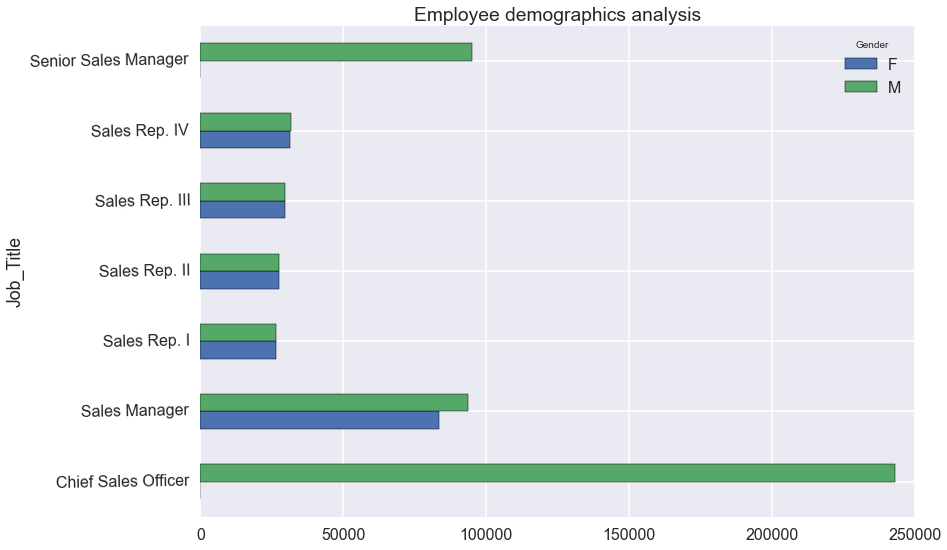

In [61]:
# Analyze the distribution of gender in various roles within the sales department
emp_category.plot(kind='barh', title='Employee demographics analysis', rot=1)

In [85]:
# emp_category = orion_sales.groupby('Job_Title').mean()
emp_category_2 = orion_sales.pivot_table('Salary', index='Job_Title', columns='Gender', aggfunc=sum)
emp_category_2

Gender,F,M
Job_Title,,
Chief Sales Officer,NaN,243190
Sales Manager,83505,280490
Sales Rep. I,553120,1116275
Sales Rep. II,657765,604340
Sales Rep. III,441535,559640
Sales Rep. IV,219940,286530
Senior Sales Manager,NaN,95090


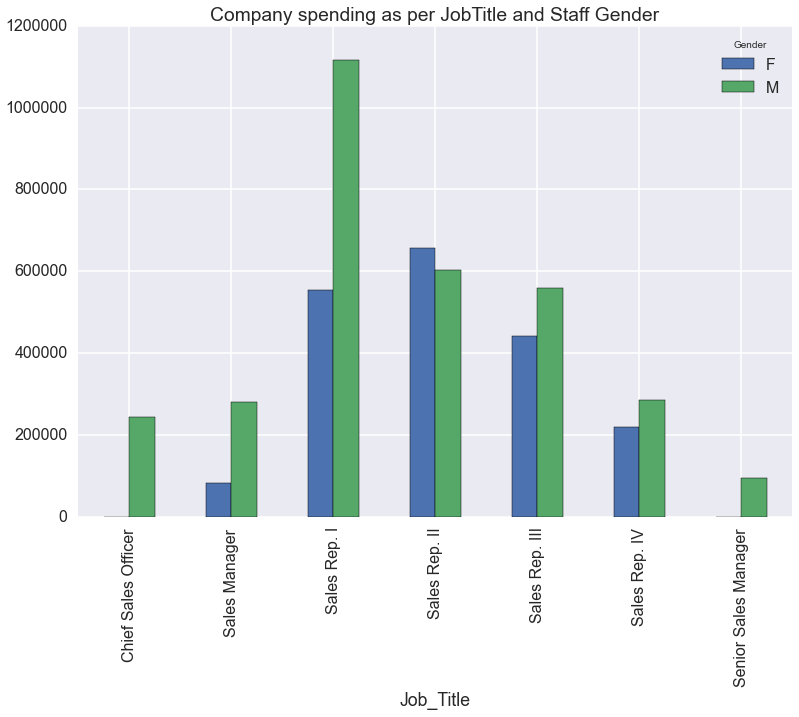

In [86]:
# Which class of employee within the dept does the company spend more on in terms of salary
emp_category_2.plot(kind='bar', title='Company spending as per JobTitle and Staff Gender')

The bar graph visualization above reveal something interesting we have not observed before. 
1. There more `males` within the `Sales` department than `Female`.
2. Orion simply do not have `females` within the top-level positions. Maybe `Orion` needs to promote more `Female` into senior positions or we may need to delve more into `Sales` department to see if women actually quit before reaching the top heirachy. (tongue in cheek comment)
3. Salary of the `Chief Sales Officer` is more than sum of average of all the `Sales Rep` within the dept.